<a href="https://colab.research.google.com/github/wdon021/From_Colab/blob/master/SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [3]:
!which python3

/usr/bin/python3


In [4]:
!pip install torchtext==0.2.3

     |████████████████████████████████| 51kB 7.5MB/s 
  Created wheel for torchtext: filename=torchtext-0.2.3-cp36-none-any.whl size=40134 sha256=066fee721c53cdd359f4fdc31a52c5e41bff7d4f010e0f101a9b816a591ebc6c
  Stored in directory: /root/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e5627ccc99543abded97204
Successfully built torchtext
  Found existing installation: torchtext 0.3.1
    Uninstalling torchtext-0.3.1:
      Successfully uninstalled torchtext-0.3.1


In [5]:
!pip install torchvision==0.2.2

     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
  Found existing installation: tqdm 4.28.1
    Uninstalling tqdm-4.28.1:
      Successfully uninstalled tqdm-4.28.1
  Found existing installation: torchvision 0.4.2+cu100
    Uninstalling torchvision-0.4.2+cu100:
      Successfully uninstalled torchvision-0.4.2+cu100


In [0]:
import torchvision

In [7]:
!pip install fastai==0.7.0

     |████████████████████████████████| 122kB 25.5MB/s 
     |████████████████████████████████| 1.5MB 33.4MB/s 
     |████████████████████████████████| 496.4MB 30kB/s 
  Created wheel for bcolz: filename=bcolz-1.2.1-cp36-cp36m-linux_x86_64.whl size=2658249 sha256=9a2acef420a30b40019c6d1ced92b4902d8d8d9376ea8d10254f4880a02122e7
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
Successfully built bcolz
  Found existing installation: torch 1.3.1+cu100
    Uninstalling torch-1.3.1+cu100:
      Successfully uninstalled torch-1.3.1+cu100
  Found existing installation: fastai 1.0.59
    Uninstalling fastai-1.0.59:
      Successfully uninstalled fastai-1.0.59


In [8]:
!pip install torch==1.3.1

     |████████████████████████████████| 734.6MB 22kB/s 
ERROR: fastai 0.7.0 has requirement torch<0.4, but you'll have torch 1.3.1 which is incompatible.
  Found existing installation: torch 0.3.1
    Uninstalling torch-0.3.1:
      Successfully uninstalled torch-0.3.1


In [0]:
import torch.nn as nn

In [0]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.io import *

In [0]:
from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *

In [0]:
PATH = "/content/gdrive/My Drive/Fastai/"

In [0]:
import os
os.makedirs(PATH, exist_ok = True)

In [0]:
URL = "http://deeplearning.net/data/mnist/"
FILENAME = 'mnist.pkl.gz'
def load_mnist(filename):
  return pickle.load(gzip.open(filename, 'rb'), encoding='latin-1')

In [15]:
%ls /content/gdrive/My\ Drive/

 15032017151120-0001.pdf
 20170311.txt.gdoc
'Anyfile Notepad Files'/
 app/
 assignment_1_projections_file.gsheet
 assignment3.gsheet
 bathdata.xlsx
'Britain Elects   Public Opinion.gsheet'
'Colab Notebooks'/
 COMP102_2019.zip
'Copy of HbA1c Comparison  study (1).gsheet'
'Copy of HbA1c Comparison  study.gsheet'
'Copy of R-code-draft.R'
 cv.gdoc
'CV of danqing.gdoc'
 dass.gdoc
 data/
 eoi.docx
 eoi.docx.gdoc
 Fastai/
 Group1_Journalpaper.docx
'HC _ Illustrations.pdf'
 HospitalERCore.java
'Hua Li Depreciation 2016.pdf'
'Hua Li Income Statement 2016.pdf'
 img-814134807-0001.pdf
'InspectionID201741815754 (1).pdf'
 InspectionID201741815754.pdf
 invoice_34036.pdf
 Japan.gsheet
 KK/
 personal/
 QQ图片20140919102610.jpg
'REAA - NZ Residential Property Sale and Purchase Agreements Guide.pdf'
'stock list.xlsx'
 traffic-violations-in-maryland-county-20122018.zip
'Untitled document (1).gdoc'
'Untitled document (2).gdoc'
'Untitled document (3).gdoc'
'Untitled document (4).gdoc'
'Untitled document.gdoc

In [0]:
get_data(URL+FILENAME, PATH+FILENAME)
((x, y), (x_valid, y_valid), _) = load_mnist(PATH + FILENAME)

In [17]:
type(x), x.shape, type(y), y.shape

(numpy.ndarray, (50000, 784), numpy.ndarray, (50000,))

In [18]:
mean = x.mean()
std = x.std()

x = (x-mean)/std
mean, std, x.mean(), x.std()

(0.13044983, 0.3072898, -3.1638146e-07, 0.99999934)

In [0]:
def show(img, title=None):
  plt.imshow(img, cmap="gray")
  if title is not None: plt.title(title)

In [0]:
def plots(ims, figsize=(12,6), rows=2, titles=None):
  f = plt.figure(figsize=figsize)
  cols = len(ims)//rows
  for i in range(len(ims)):
    sp = f.add_subplot(rows, cols, i+1)
    sp.axis('Off')
    if titles is not None: sp.set_title(titles[i], fontsize=16)
    plt.imshow(ims[i], cmap='gray')

In [21]:
x_valid.shape

(10000, 784)

In [22]:
x_imgs = np.reshape(x_valid, (-1, 28, 28)); x_imgs.shape

(10000, 28, 28)

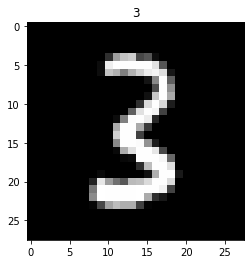

In [23]:
show(x_imgs[0], y_valid[0])

In [24]:
y_valid.shape

(10000,)

In [25]:
y_valid[0]

3

In [26]:
x_imgs[0, 10:20, 10:20]

array([[0.     , 0.     , 0.     , 0.     , 0.18359, 0.85156, 0.99219, 0.84375, 0.11328, 0.     ],
       [0.     , 0.     , 0.     , 0.37109, 0.87891, 0.99219, 0.95703, 0.25391, 0.     , 0.     ],
       [0.     , 0.04688, 0.5    , 0.98438, 0.99219, 0.92188, 0.15625, 0.     , 0.     , 0.     ],
       [0.     , 0.67188, 0.99219, 0.99219, 0.66406, 0.22656, 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.80859, 0.99219, 0.99219, 0.25391, 0.     , 0.     , 0.     , 0.     , 0.     ],
       [0.     , 0.53516, 0.99219, 0.99219, 0.98047, 0.57031, 0.10156, 0.     , 0.     , 0.     ],
       [0.     , 0.03516, 0.67578, 0.875  , 0.99219, 0.99219, 0.89844, 0.27734, 0.     , 0.     ],
       [0.     , 0.     , 0.03125, 0.04688, 0.99219, 0.99219, 0.99219, 0.96094, 0.40625, 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.17969, 0.73828, 0.99219, 0.99219, 0.875  , 0.     ],
       [0.     , 0.     , 0.     , 0.     , 0.     , 0.06641, 0.68359, 0.99219, 0.99219, 0.09766]],
      dty

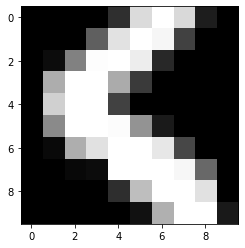

In [27]:
show(x_imgs[0, 10:20, 10:20])

In [0]:
#:8 means 到8 #### 8:means 从8开始

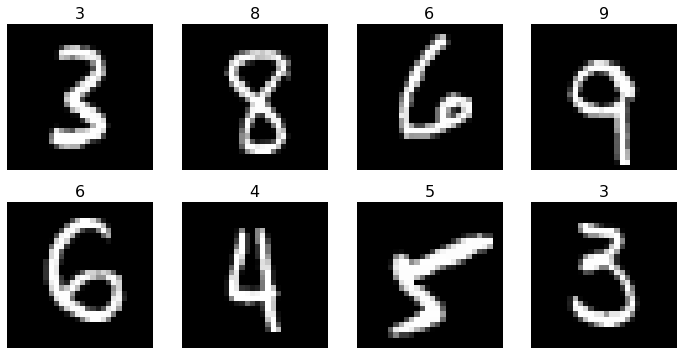

In [29]:
plots(x_imgs[:8], titles=y_valid[:8])

In [0]:

net = nn.Sequential(
    nn.Linear(28*28, 100),
    nn.ReLU(),
    nn.Linear(100, 100),
    nn.ReLU(),
    nn.Linear(100, 10),
    nn.LogSoftmax()
).cuda()

In [0]:
md = ImageClassifierData.from_arrays(PATH, (x,y), (x_valid, y_valid))

In [0]:

loss=nn.NLLLoss()
metrics=[]
# opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9)
opt=optim.SGD(net.parameters(), 1e-1, momentum=0.9, weight_decay=1e-3)

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [34]:
fit(net, md, n_epochs=5, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   
    0      0.240447   0.83535   
    1      0.186014   0.503083  
    2      0.196346   0.599403  
    3      0.204255   0.549576  
    4      0.196815   0.596819  



[0.5968194566726684]

In [0]:
set_lrs(opt, 1e-2)

In [36]:
fit(net, md, n_epochs=3, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   
    0      0.077463   0.505742  
    1      0.050033   0.468442  
    2      0.051025   0.430792  



[0.43079245953559875]

In [37]:
t = [o.numel() for o in net.parameters()]
t, sum(t)

([78400, 100, 10000, 100, 1000, 10], 89610)

In [38]:
torch.cuda.is_available()

True

In [39]:
!ls /usr/local/lib/python3.6/dist-packages

absl
absl_py-0.8.1.dist-info
alabaster
alabaster-0.7.12.dist-info
albumentations
albumentations-0.1.12.dist-info
altair
altair-3.2.0.dist-info
apiclient
astor
astor-0.8.0.dist-info
astropy
astropy-3.0.5.dist-info
atari_py
atari_py-0.2.6.dist-info
atomicwrites
atomicwrites-1.3.0.dist-info
attr
attrs-19.3.0.dist-info
audioread
audioread-2.1.8.dist-info
autograd
autograd-1.3.dist-info
babel
Babel-2.7.0.dist-info
backcall
backcall-0.1.0.dist-info
backports
backports.tempfile-1.0.dist-info
backports.weakref-1.0.post1.dist-info
bcolz
bcolz-1.2.1.dist-info
beautifulsoup4-4.6.3.dist-info
bin
bleach
bleach-3.1.0.dist-info
blis
blis-0.2.4.dist-info
bokeh
bokeh-1.0.4.dist-info
boto
boto-2.49.0.dist-info
boto3
boto3-1.10.14.dist-info
botocore
botocore-1.13.14.dist-info
bottleneck
Bottleneck-1.2.1.dist-info
branca
branca-0.3.1.dist-info
bs4
bs4-0.0.1.dist-info
bson
bz2file-0.98.dist-info
bz2file.py
cachetools
cachetools-3.1.1.dist-info
caffe2
certifi
certifi-2019.9.11.dist-info
cffi
cffi-1.13.2.dis

In [0]:
preds = predict(net, md.val_dl)

In [41]:
preds.shape

(10000, 10)

In [42]:
preds.argmax(axis=1)[:5]

array([3, 8, 6, 9, 6])

In [0]:
preds = preds.argmax(1)

In [44]:
np.mean(preds == y_valid)

0.9351

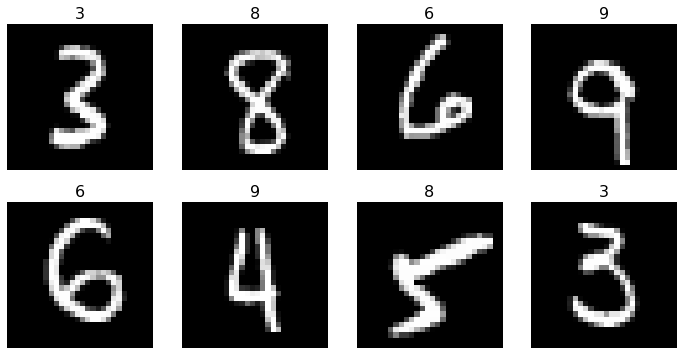

In [45]:
plots(x_imgs[:8], titles=preds[:8])

**Defining Logistic Regression ourselves**

In [0]:
def get_weights(*dims): return nn.Parameter(torch.randn(dims)/dims[0])
def softmax(x): return torch.exp(x)/(torch.exp(x).sum(dim=1)[:,None])

class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_w = get_weights(28*28, 10)  # Layer 1 weights
        self.l1_b = get_weights(10)         # Layer 1 bias

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = (x @ self.l1_w) + self.l1_b  # Linear Layer
        x = torch.log(softmax(x)) # Non-linear (LogSoftmax) Layer
        return x

In [0]:
net2 = LogReg().cuda()
opt = optim.Adam(net2.parameters())

In [48]:
fit(net2, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics )

epoch      trn_loss   val_loss   
    0      0.329091   0.873973  



[0.8739732896804809]

In [0]:
dl = iter(md.trn_dl)

In [0]:
xmb, ymb = next(dl)

In [51]:
vxmb = Variable(xmb.cuda())
vxmb

tensor([[-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        ...,
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245],
        [-0.4245, -0.4245, -0.4245,  ..., -0.4245, -0.4245, -0.4245]],
       device='cuda:0')

In [52]:
preds = net2(vxmb).exp(); preds[:3]

tensor([[9.7742e-01, 3.7015e-06, 1.1815e-03, 4.5432e-05, 1.6638e-06, 1.5634e-02,
         4.7265e-03, 2.8807e-04, 6.8958e-04, 1.1519e-05],
        [1.3575e-03, 6.7999e-08, 1.7024e-06, 2.9539e-04, 2.2887e-02, 8.2368e-04,
         1.6503e-04, 2.7692e-02, 6.0062e-04, 9.4618e-01],
        [7.3384e-06, 9.3493e-01, 2.7093e-02, 1.5624e-03, 4.1938e-06, 6.6846e-05,
         1.7961e-03, 1.1383e-05, 3.4353e-02, 1.7467e-04]], device='cuda:0',
       grad_fn=<SliceBackward>)

In [0]:
preds = preds.data.max(1)[1]

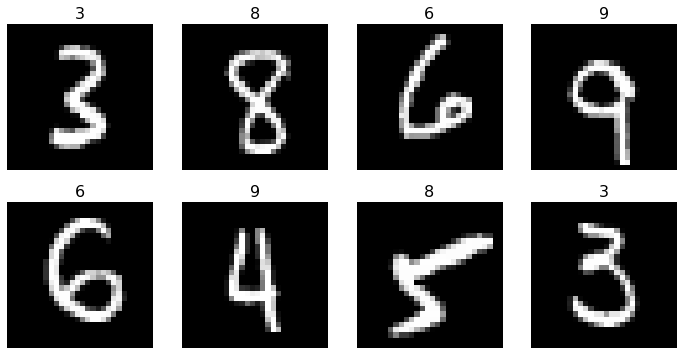

In [54]:
preds = predict(net2, md.val_dl).argmax(1)
plots(x_imgs[:8], titles=preds[:8])

In [0]:
np.mean(preds == y_valid)

0.8188

In [0]:
a = np.array([10, 6, -4])
b = np.array([2, 8, 7])
a,b

(array([10,  6, -4]), array([2, 8, 7]))

In [0]:
a+b

array([12, 14,  3])

In [0]:
(a<b).mean()

0.6666666666666666

In [0]:
a

array([10,  6, -4])

In [0]:
a>0

array([ True,  True, False])

In [0]:
a+1

array([11,  7, -3])

In [56]:
m = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]); m

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [0]:
2*m

array([[ 2,  4,  6],
       [ 8, 10, 12],
       [14, 16, 18]])

In [57]:
c = np.array([10, 20, 30]); c

array([10, 20, 30])

In [0]:
m + c

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [0]:
c+m

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [0]:
c.shape

(3,)

In [0]:
np.broadcast_to(np.expand_dims(c, 0), (3, 3))

array([[10, 20, 30],
       [10, 20, 30],
       [10, 20, 30]])

In [0]:
np.broadcast_to(c[:, None], m.shape)

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [0]:
c.shape

(3,)

In [0]:
np.expand_dims(c, 0).shape

(1, 3)

In [0]:
m+np.expand_dims(c, 0)

array([[11, 22, 33],
       [14, 25, 36],
       [17, 28, 39]])

In [0]:
np.expand_dims(c, 1)

array([[10],
       [20],
       [30]])

In [0]:
c[:, None].shape

(3, 1)

In [0]:
m+np.expand_dims(c,1)

array([[11, 12, 13],
       [24, 25, 26],
       [37, 38, 39]])

In [0]:
np.broadcast_to(np.expand_dims(c,1), (3,3))

array([[10, 10, 10],
       [20, 20, 20],
       [30, 30, 30]])

In [0]:
c[None]

array([[10, 20, 30]])

In [0]:
c[:, None]

array([[10],
       [20],
       [30]])

In [0]:
c[None] >c[:,None]

array([[False,  True,  True],
       [False, False,  True],
       [False, False, False]])

In [0]:
xg, yg = np.ogrid[0:5, 0:5]

**Matrix Multiplication**

In [58]:
m, c

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]), array([10, 20, 30]))

In [59]:
m @ c

array([140, 320, 500])

In [60]:
T(m) @ T(c)

RuntimeError: ignored

Writing our Own Training Loop


In [78]:
# Our code from above
class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1_w = get_weights(28*28, 10)  # Layer 1 weights
        self.l1_b = get_weights(10)         # Layer 1 bias

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = x @ self.l1_w + self.l1_b 
        return torch.log(softmax(x))

net2 = LogReg().cuda()
opt=optim.Adam(net2.parameters())

fit(net2, md, n_epochs=1, crit=loss, opt=opt, metrics=metrics)

epoch      trn_loss   val_loss   
    0      0.318904   0.87293   



[0.8729296744346619]

In [0]:
net2 = LogReg().cuda()
loss = nn.NLLLoss()
learning_rate = 1e-3
optimizer = optim.Adam(net2.parameters(), lr=learning_rate)

In [0]:
dl = iter(md.trn_dl)

In [0]:
xt, yt = next(dl)
y_pred = net2(Variable(xt).cuda())

In [82]:
l = loss(y_pred, Variable(yt).cuda())
print(l)

tensor(2.3240, device='cuda:0', grad_fn=<NllLossBackward>)


In [83]:
np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))

0.0625

In [0]:
# before the backward pass, use the optimizer object to zero all of the
# gradients for the variables it will update (which are the learnable weights of the model)
optimizer.zero_grad()

# Backward pass: compute gradient of the loss with respect to model parameters
l.backward()

# calling the step function on an optimizer makes an update to its parameters
optimizer.step()

In [0]:
xt, yt = next(dl)

In [0]:
y_pred = net2(Variable(xt).cuda())

In [87]:
l = loss(y_pred, Variable(yt).cuda())
print(l)

tensor(2.1890, device='cuda:0', grad_fn=<NllLossBackward>)


Note that we are using stochastic gradient descent, so the loss is not guaranteed to be strictly better each time, the stochasticity comes from the fact that we are using mini-batches; we are jst using 64 images to calculate our prediction and update the weights, not the whole dataset

In [88]:
np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))

0.1875

if we run several iteration in a loop, we should see the loss decrease and the accuracy increase with time


In [90]:
for t in range(100):
    xt, yt = next(dl)
    y_pred = net2(Variable(xt).cuda())
    l = loss(y_pred, Variable(yt).cuda())
    
    if t % 10 == 0:
        accuracy = np.mean(to_np(y_pred).argmax(axis=1) == to_np(yt))
        print("loss: ", l.data, "\t accuracy: ", accuracy) #change l.data[0] to l.data to fix error

    optimizer.zero_grad()
    l.backward()
    optimizer.step()

loss:  tensor(2.2041, device='cuda:0') 	 accuracy:  0.3125
loss:  tensor(1.3390, device='cuda:0') 	 accuracy:  0.703125
loss:  tensor(0.8628, device='cuda:0') 	 accuracy:  0.8125
loss:  tensor(0.7757, device='cuda:0') 	 accuracy:  0.765625
loss:  tensor(0.6695, device='cuda:0') 	 accuracy:  0.859375
loss:  tensor(0.5472, device='cuda:0') 	 accuracy:  0.859375
loss:  tensor(0.6503, device='cuda:0') 	 accuracy:  0.8125
loss:  tensor(0.5058, device='cuda:0') 	 accuracy:  0.84375
loss:  tensor(0.5108, device='cuda:0') 	 accuracy:  0.921875
loss:  tensor(0.5252, device='cuda:0') 	 accuracy:  0.875


Put it all togather in a training loop


Stochastic Gradient Descent


Nearly all of deep learning is powered by one very important algorithm: stochastic gradient descent(SGD). SGD can be seeing as an approximation of gradient descent(GD). in GD you have to run through all the samples in your training set to do a single itaration. In SGD you use only a subset of training samples to do the update fro a parameter in a particular iteration. The subset used in each iteration is called a batch or minibatch.

Now, instead of using the optimizer, we will do the optimization our selves.

In [0]:
def score(x, y):
  y_pred = to_np(net2(V(x)))
  return np.sum(y_pred.argmax(axis=1) == to_np(y))/len(y_pred)

In [127]:
net2 = LogReg().cuda()
loss = nn.NLLLoss()
learning_rate = 1e-2
optimizer = optim.SGD(net2.parameters(), lr=learning_rate)

for epoch in range(2):
  losses=[]
  dl = iter(md.trn_dl)
  for t in enumerate(dl): # instead of range(len(dl))
    xt, yt = next(dl)
    y_pred = net2(V(xt))
    l = loss(y_pred, V(yt))
    losses.append(l)

    # before the backward pass, use the optimizer object to zero all of the 
    #gradients for the variables it will update (which are the learnable weights of the model)
    optimizer.zero_grad()
    #backward pass: compute gradient of the loss with respect to model parameters
    l.backward()

    #calling the step function on an optimizer makes an update to its parameters
    optimizer.step()
  val_dl = iter(md.val_dl)
  val_scores = [score(*next(val_dl)) for i in range(len(val_dl.__next__()))]
  print(np.mean(val_scores))

0.8203125
0.8359375


In [0]:
val_dl = iter(md.val_dl)

In [120]:
for i in len(val_dl.__next__()):

2

In [92]:
net2 = LogReg().cuda()
loss_fn=nn.NLLLoss()
lr = 1e-2
w,b = net2.l1_w,net2.l1_b

for epoch in range(1):
    losses=[]
    dl = iter(md.trn_dl)
    for t in range(len(dl)):
        xt, yt = next(dl)
        y_pred = net2(V(xt))
        l = loss(y_pred, Variable(yt).cuda())
        losses.append(loss)

        # Backward pass: compute gradient of the loss with respect to model parameters
        l.backward()
        w.data -= w.grad.data * lr
        b.data -= b.grad.data * lr
        
        w.grad.data.zero_()
        b.grad.data.zero_()   

    val_dl = iter(md.val_dl)
    val_scores = [score(*next(val_dl)) for i in range(len(val_dl))]
    print(np.mean(val_scores))

TypeError: ignored